Resolveremos el suguiente problema con ayuda de $R$.

## Problema estimación
Se desea estimar la probabilidad de falla, $\textit{p}$, en el proceso de producción mediante la observación de $\textit{n}$ objetos elejidos independientemente. Se sabe que $\textit{p}$ esta comprendida entre 0.1 y 0.3, por la información previa que se dispone sobre el proceso. Se desea hallar el tamaño de la muestra para que la probabilidad de que la proporción de objetos de la muestra difiera del verdadero valor de $\textit{p}$ en menos de 0.001 sea al menos de 0.95.

### Intento 1 

Como primer intento de solución. Queremos encontrar $n$ tal que
    $\begin{align*}
    \mathbb{P}[p-0.01\leq S_n \leq p + 0.01] \leq 0.95.
    \end{align*}$
Restando en cada lado de las desigualdades $\textit{p}$ y dividiendo entre $\sqrt{\sigma^2/n}$,  donde $\sigma^2$ es la varianza del proceso visto como variable aleatoria, la igualdad anterior es quivalente a la expresión.
    $\begin{align*}
    \mathbb{P}\left[\frac{-0.01}{\sqrt{\sigma^2/n}}\leq \frac{S_n - p}{\sqrt{\sigma^2/n}} \leq \frac{0.01}{\sqrt{\sigma^2/n}}\right] \leq 0.95
    \end{align*}$

Por el teorema central del límite, la probabilidad indicada es aproximadamente igual a $P[-0.01/\sqrt{\sigma^2/n}\leq Z \leq 0.01/\sqrt{\sigma^2/n}]\leq 0.95$, donde $\textit{Z}$ es una variable aleatoria con distribución normal estandar.

La ecuación de aproximación es 
    $\begin{align*}
    \phi(\frac{0.01}{\sqrt{\sigma^2/n}})-\phi(\frac{-0.01}{\sqrt{\sigma^2/n}})=0.95
    \end{align*}$
    
De lo cual necesitamos encontrar $\textit{x}$ tal que $\phi(x)-\phi(-x)=0.95$. El valor de $\textit{x}$ es aproximadamente 1.69. De lo cual obtenemos la siguiente ecuacion   
    $\begin{align*}
    \frac{0.1}{\sqrt{\sigma^2/n}}=\frac{0.1}{\sqrt{(p(1-p))/n}}=1.69
    \end{align*}$
\#Pero aquí tenemos una ecuación con dos incognitas $\textit{n}$ y $\textit{p}$

### Intento 2
Debido a que analiticamente no hemos llegado a una solución explicíta,  una manera ocupando el poder de $R$ es la siguiente

In [1]:
#Recordemos que la suma de variables aleatorias bernoulli(p) es igual a una varble aleatoria binomial(n,p)
#aprovechando lo anterior creamos la siguiente función

#Esta función es asumir un error de 0.01 y ver cual es la probabilidad de que en una varible binomial(n,p)
#obtegamos este rango
calcPorcentaje <- function(n, p) {
  a <- (p - 0.01)*(n)
  b <- (p + 0.01)*(n)
  porcentaje <- pbinom(b, n, p)-pbinom(a, n, p)
  return(porcentaje)
}

In [2]:
#la siguiente función nos da el tamaño de la muestra para el cual alcanzamos el porcentaje deseado
tamanoMuestra <- function(p,probmax=0.95,n=0){
  porcentaje <- 0 
  while (porcentaje < probmax) {
    porcentaje <- calcPorcentaje(n,p)
    n = n + 1
  }
 return(n-1)
}

In [3]:
#vectorizamos la fnción para que sea más sencillo trabajar y efectuamos la función a nuestro problema
tamanoMuestraVec <- Vectorize(tamanoMuestra)
z <- tamanoMuestraVec(p = seq(0.1,0.3,0.00005))
max(z)

[1] 8010

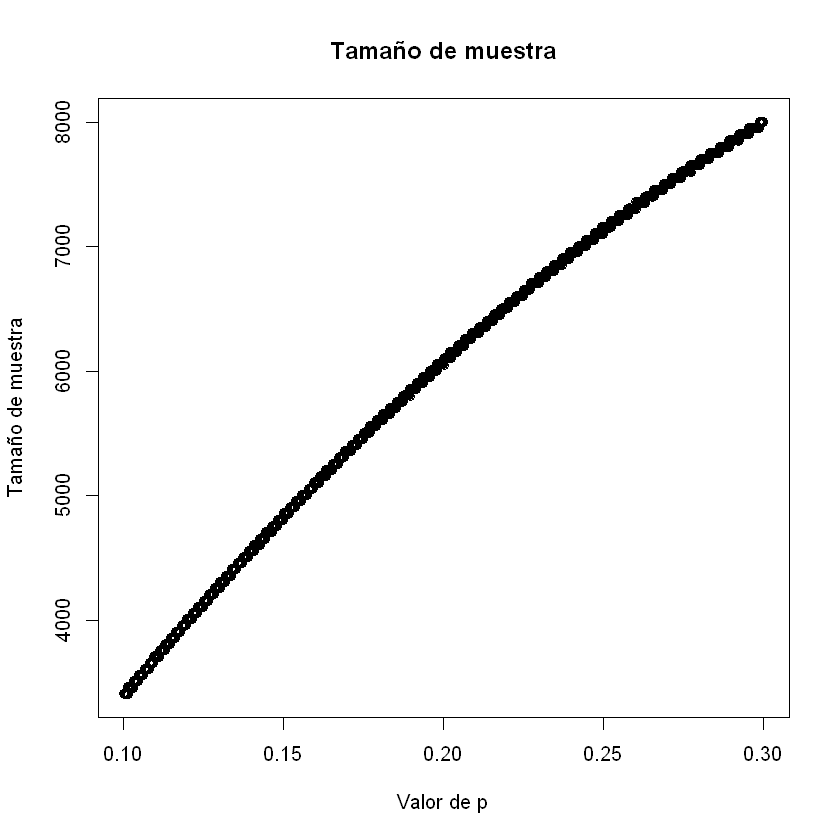

In [4]:
plot(seq(0.1,0.3,0.00005), z, main="Tamaño de muestra", xlab="Valor de p", ylab="Tamaño de muestra")

In [5]:
#lo anterior aunque es una buen número con el que podemos estimar, en el sentido estricto no necesariamente es la solución
#y efectivamente pues estamos pensando en p de manera discreta, entonces conforme calculemos para valores de p más pequeños
#haciendo calculos el número para obtener exactamente con un computo de diferencias de 0.0000001  el valor resultante es 8100
#puede verificarse corriendo la siguiente línea de código

calcPorcentajeVec <- Vectorize(calcPorcentaje)
min(calcPorcentajeVec(8100,seq(0.1,0.3,0.00000001)))

[1] 0.9504542

In [6]:
#aquí dependera de cual es el costo de producir focos, para ver si tomamos la decisión de estimar con 8010 o con 8100